## Практическое задание

  1. Постройте нейронную сеть(берем простую линейную сеть, которую разбирали на уроке: меняем число слоев, число нейронов , типы активации, тип оптимизатора)  на датасет from sklearn.datasets import load_boston. 
  2. Измените функцию потерь и метрику для этой задачи. Постройте 10-15 вариантов и сведите результаты их работы в таблицу  Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

  3. Поработайте с документацией TensorFlow 2. Найти 2-3 полезные команды TensorFlow, не разобранные на уроке (полезные для Вас).

In [1]:
import tensorflow as tf
print(tf.__version__)
msg = tf.constant('TensorFlow 2.0 Hello World')
tf.print(msg)

2.6.0
TensorFlow 2.0 Hello World


In [2]:
x = tf.random.uniform([3, 3])

print("есть ли доступные GPU: "),
print(tf.config.experimental.list_physical_devices("GPU"))

print("тензор на GPU #0:  "),
print(x.device.endswith('GPU:0'))


есть ли доступные GPU: 
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
тензор на GPU #0:  
True


In [3]:
from tensorflow.keras.datasets import boston_housing
(X_train, y_train), (X_test, y_test) = boston_housing.load_data(test_split=0.2)

print(X_train.shape, X_test.shape)

65536/57026 [==================================] - 0s 0us/step
(404, 13) (102, 13)


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

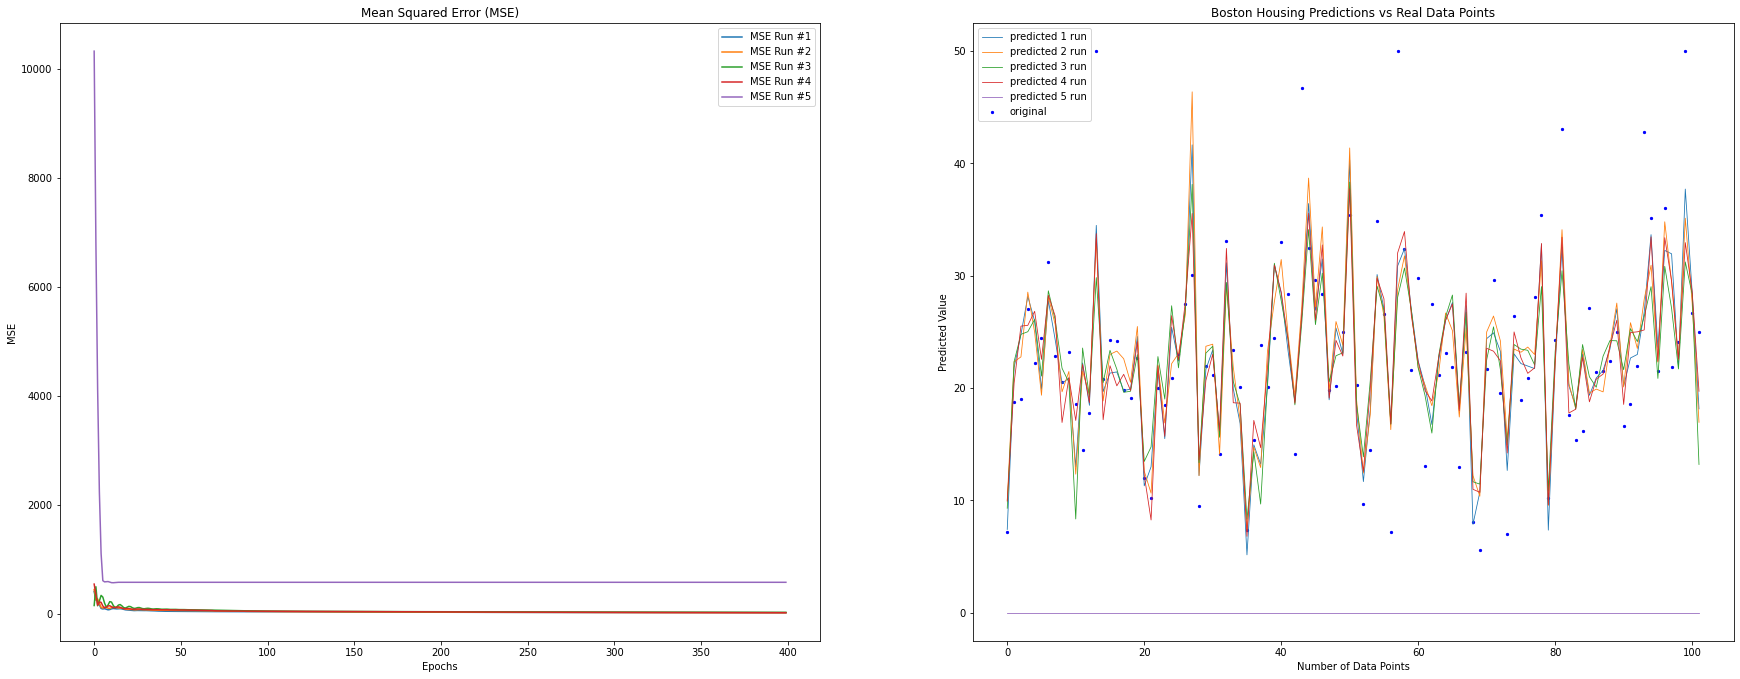

In [47]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(30, 25))
for i in range(1,6):
  bigger_model = Sequential()
  bigger_model.add(Dense(32, activation='relu', input_shape=(13,)))
  bigger_model.add(Flatten())
  bigger_model.add(Dense(64, activation=tf.keras.layers.LeakyReLU(alpha=0.5)))
  bigger_model.add(Dense(1, activation='relu'))

  bigger_model.compile(optimizer='adam',
                      loss='mse',
                      metrics=['mse'])

  bigger_history = bigger_model.fit(X_train, y_train, batch_size=1000, epochs=400, verbose=False)
  ypred = bigger_model.predict(X_test)

  x_ax = range(len(ypred))
  plt.subplot(2,2,1)
  plt.plot(bigger_history.history['mse'], label='MSE Run #'+str(i))
  plt.title("Mean Squared Error (MSE)")
  plt.xlabel("Epochs")
  plt.ylabel("MSE")
  plt.legend()
  plt.subplot(2,2,2)
  plt.plot(x_ax, ypred, lw=0.8, label="predicted "+str(i)+" run")
  plt.title("Boston Housing Predictions vs Real Data Points")
  plt.xlabel("Number of Data Points")
  plt.ylabel("Predicted Value")
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.legend()
plt.show()

In [48]:
print(bigger_model.evaluate(X_train, y_train))

13/13 [==============================] - 0s 2ms/step - loss: 586.1605 - mse: 586.1605
[586.1604614257812, 586.1604614257812]


In [49]:
print("MSE: %.4f" % mean_squared_error(y_test, ypred))

MSE: 615.8578


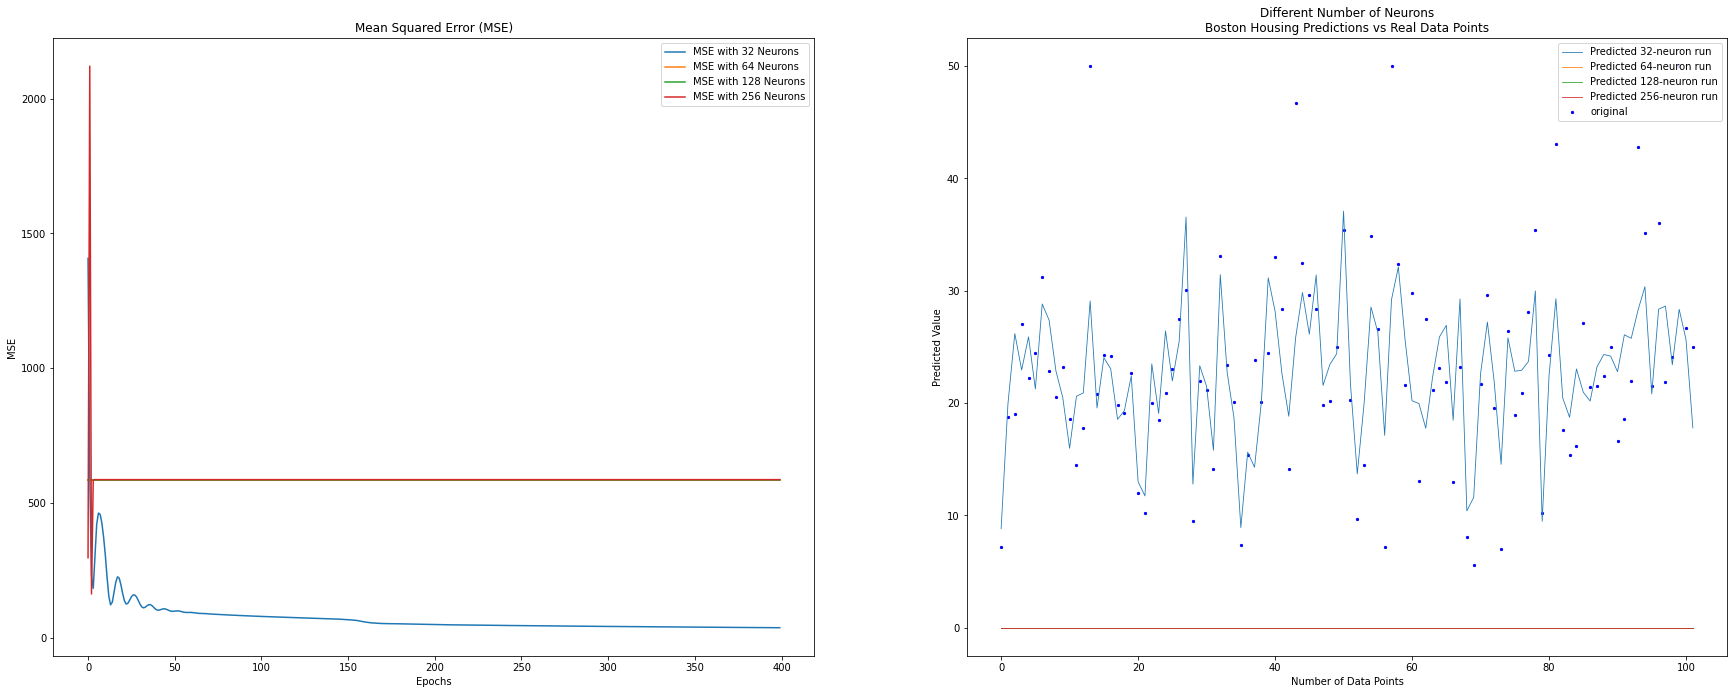

In [50]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(30, 25))
neurons = [32, 64, 128, 256]
for index, value in enumerate(neurons[:]):
  bigger_model = Sequential()
  bigger_model.add(Dense(neurons[index], activation='relu', input_shape=(13,)))
  bigger_model.add(Flatten())
  try:
    bigger_model.add(Dense(neurons[index+1], activation=tf.keras.layers.LeakyReLU(alpha=0.5)))
  except:
    bigger_model.add(Dense(neurons[index], activation=tf.keras.layers.LeakyReLU(alpha=0.5)))
  bigger_model.add(Dense(1, activation='relu'))

  bigger_model.compile(optimizer='adam',
                      loss='mse',
                      metrics=['mse'])

  bigger_history = bigger_model.fit(X_train, y_train, batch_size=1000, epochs=400, verbose=False)
  ypred = bigger_model.predict(X_test)

  x_ax = range(len(ypred))
  plt.subplot(2,2,1)
  plt.plot(bigger_history.history['mse'], label='MSE with '+str(value)+ ' Neurons')
  plt.title("Mean Squared Error (MSE)")
  plt.xlabel("Epochs")
  plt.ylabel("MSE")
  plt.legend()
  plt.subplot(2,2,2)
  plt.plot(x_ax, ypred, lw=0.8, label="Predicted "+str(value)+"-neuron run")
  plt.title("Different Number of Neurons\nBoston Housing Predictions vs Real Data Points")
  plt.xlabel("Number of Data Points")
  plt.ylabel("Predicted Value")
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.legend()
plt.show()

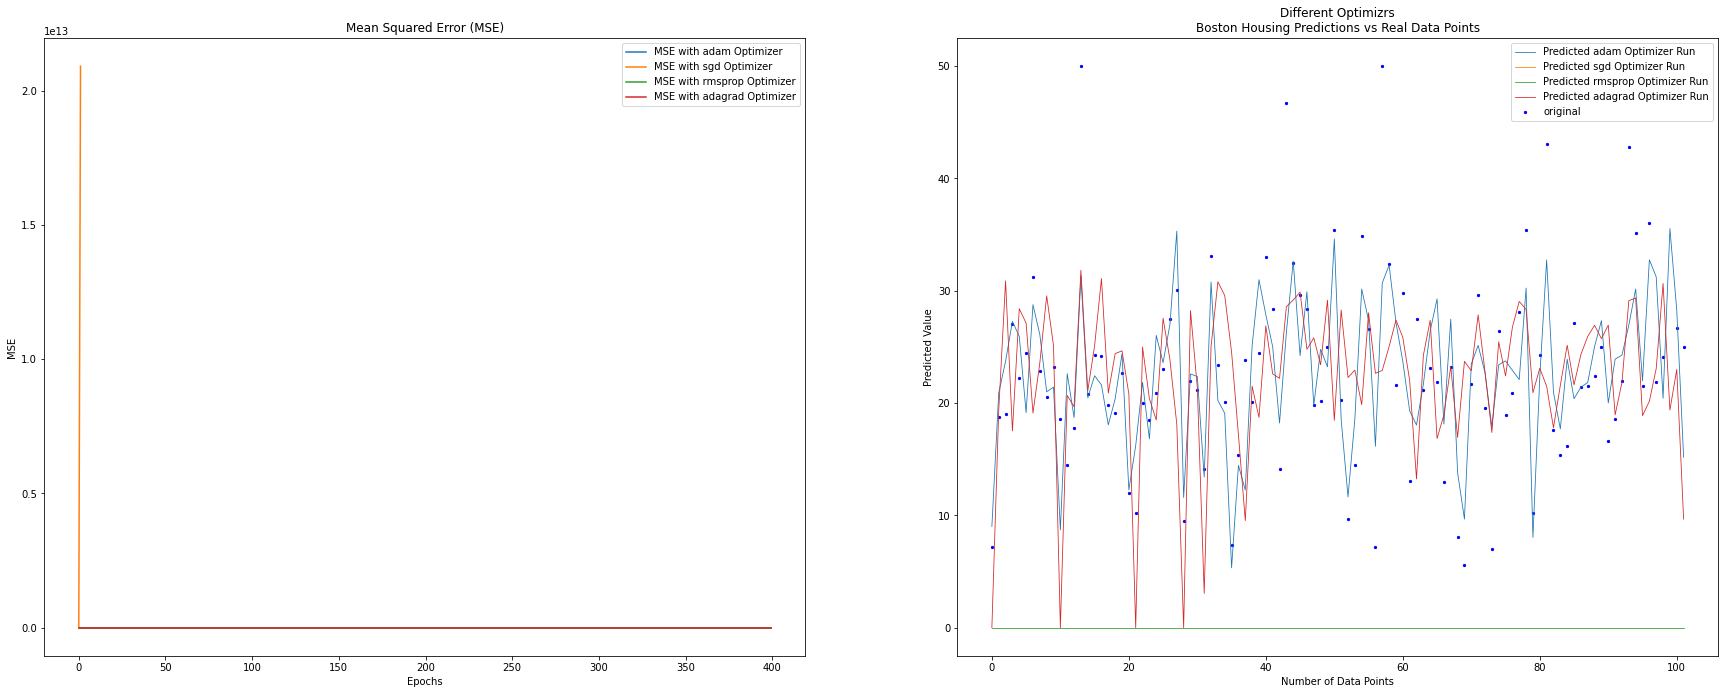

In [51]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(30, 25))
optimizers = ["adam", "sgd", "rmsprop", "adagrad"]
for optimizer in optimizers:
  bigger_model = Sequential()
  bigger_model.add(Dense(32, activation='relu', input_shape=(13,)))
  bigger_model.add(Flatten())
  bigger_model.add(Dense(64, activation=tf.keras.layers.LeakyReLU(alpha=0.5)))
  bigger_model.add(Dense(1, activation='relu'))

  bigger_model.compile(optimizer=optimizer,
                      loss='mse',
                      metrics=['mse'])

  bigger_history = bigger_model.fit(X_train, y_train, batch_size=1000, epochs=400, verbose=False)
  ypred = bigger_model.predict(X_test)

  x_ax = range(len(ypred))
  plt.subplot(2,2,1)
  plt.plot(bigger_history.history['mse'], label='MSE with '+str(optimizer)+ ' Optimizer')
  plt.title("Mean Squared Error (MSE)")
  plt.xlabel("Epochs")
  plt.ylabel("MSE")
  plt.legend()
  plt.subplot(2,2,2)
  plt.plot(x_ax, ypred, lw=0.8, label="Predicted "+str(optimizer)+" Optimizer Run")
  plt.title("Different Optimizrs\nBoston Housing Predictions vs Real Data Points")
  plt.xlabel("Number of Data Points")
  plt.ylabel("Predicted Value")
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.legend()
plt.show()